<a href="https://colab.research.google.com/github/edgeemer/genome-assembly/blob/main/pan_genome_annotation_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Path to the gene_presence_absence.csv file on your Google Colab environment
file_path = '/path/to/gene_presence_absence.csv'

In [3]:
# Read the CSV file into a DataFrame
gene_data = pd.read_csv("gene_presence_absence.csv")

In [4]:
# Define the total number of isolates as the maximum found in the 'No. isolates' column
total_isolates = gene_data['No. isolates'].max()

In [5]:
# Define the thresholds for core, soft core, shell, and cloud genes
core_threshold = total_isolates * 0.99
soft_core_threshold = total_isolates * 0.95
shell_threshold = total_isolates * 0.15

In [6]:
# Categorize genes based on the presence in isolate counts
gene_data['Category'] = pd.cut(gene_data['No. isolates'],
                               bins=[0, shell_threshold, soft_core_threshold, core_threshold, total_isolates],
                               labels=['Cloud', 'Shell', 'Soft Core', 'Core'],
                               include_lowest=True)

In [7]:
# Further categorize based on the 'Annotation' column for hypothetical protein or other
gene_data['Subcategory'] = gene_data['Annotation'].apply(lambda x: 'Hypothetical' if 'hypothetical protein' in str(x) else 'Non-Hypothetical')


In [8]:
# Group by the new categories and count
gene_counts = gene_data.groupby(['Category', 'Subcategory']).size().unstack(fill_value=0)

In [9]:
# Calculate the total number of genes
total_gene_count = gene_data.shape[0]

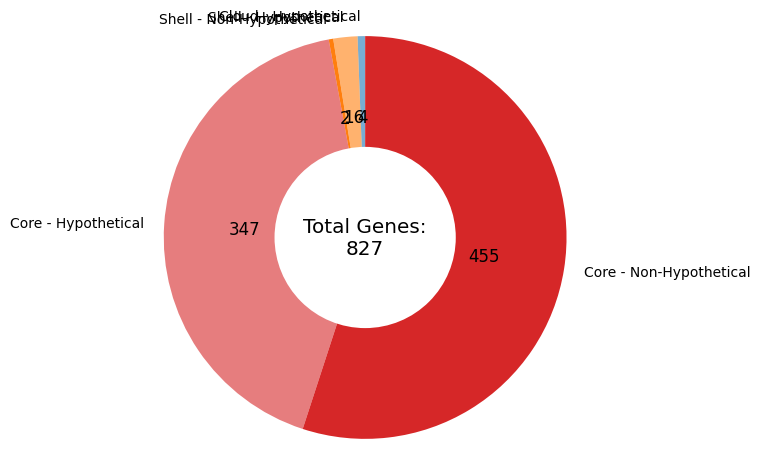

In [11]:
# Define specific colors for each category
category_colors = {
    'Cloud': '#1f77b4',
    'Shell': '#ff7f0e',
    'Soft Core': '#2ca02c',
    'Core': '#d62728'
}

# Define specific colors for each subcategory within the categories
subcategory_colors = {
    'Hypothetical': 'light',
    'Non-Hypothetical': 'dark'
}

# Prepare data for pie chart
labels = []
sizes = []
colors = []

# Create labels, sizes, and colors for each segment
for index, (category, row) in enumerate(gene_counts.iterrows()):
    for subcategory, count in row.items():
        if count > 0:  # Only add segments for counts greater than zero
            labels.append(f"{category} - {subcategory}")
            sizes.append(count)
            # Assign a shade of the category color based on the subcategory
            base_color = category_colors[category]
            shade = subcategory_colors[subcategory]
            if shade == 'light':
                # Lighten color
                colors.append(base_color + '99')  # Adding '99' will create a lighter shade
            else:
                # Darken color (assuming the color is in hexadecimal format)
                colors.append(base_color + 'ff')  # Adding 'ff' will create a darker shade

# Plotting the pie chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, labels=labels, colors=colors, startangle=90, autopct=lambda pct: f'{int(pct/100.*sum(sizes))}')

# Customize autotexts (the count labels on the chart)
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_size('large')

# Draw a circle at the center to turn the pie into a donut chart
centre_circle = plt.Circle((0,0),0.45,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Add the total in the center
total_genes = sum(sizes)
plt.text(0, 0, f'Total Genes:\n{total_genes}', ha='center', va='center', fontsize='x-large')

plt.tight_layout()
plt.show()

In [10]:
# Print the analysis results
print(gene_counts)
print(f"\nTotal number of genes: {total_gene_count}")

Subcategory  Hypothetical  Non-Hypothetical
Category                                   
Cloud                   5                 0
Shell                  16                 3
Soft Core               0                 0
Core                  348               455

Total number of genes: 827
